# 0. Imports and Initial Configs

## 0.1. Libraries

In [14]:
# Gerais
import pandas as pd
import warnings 

# Graficos
import seaborn as sns
from matplotlib import pyplot as plt

## 0.2 Initial Config

In [15]:
# Comando para remover os warnings
warnings.filterwarnings("ignore")

# Comando para configurar o pandas e remover o limite de exibição
# de linhas e colunas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Suppres scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

## 0.3 Loading Data

In [16]:
path_name = '../data/processed/processed_data.csv'

df_raw = pd.read_csv(path_name)

# 1.0 EDA

In [17]:
df1 = df_raw.copy()

In [18]:
df1.head().T

,0,1,2,3,4
id,240780,220675,291927,651493,445296
won_time,2022-01-03,2022-01-03,2022-01-03,2022-01-04,2022-01-04
vendedor,Bruna Lopes,Igor Martins,Igor Martins,Igor Martins,Igor Martins
mrr_receita_recorrente,404,542,283,252,514
nrr_receita_nao_recorrente,287,480,95,493,437
pipeline_id,36,16,16,16,16
plano,Astrea Starter,Astrea Starter,Astrea Pro,Astrea Starter,Astrea Starter
periodicidade,Mensal,Mensal,Mensal,Mensal,Anual
churn_rate,0.070,0.070,0.070,0.070,0.070
ano,2022,2022,2022,2022,2022


## Hipotese 1

### Relação entre Desempenho do Vendedor e Receita Total

---

#### **Análise dos Dados**

1. **Quantidade de Vendas por Categoria de Desempenho**  
   - **Abaixo da Meta**: Menor número de vendas.  
   - **Próximo da Meta**: Volume intermediário de vendas.  
   - **Atingiu a Meta**: Maior volume de vendas.

2. **Receita Média por Categoria**  
   - **Abaixo da Meta**: R\$ 200 (valor hipotético baseado no gráfico).  
   - **Próximo da Meta**: R\$ 400.  
   - **Atingiu a Meta**: R\$ 700.

3. **Receita Total por Categoria**  
   - **Abaixo da Meta**: Até R\$ 200 (distribuição concentrada em valores baixos).  
   - **Próximo da Meta**: Entre R\$ 400–R\$ 800.  
   - **Atingiu a Meta**: Acima de R\$ 1.000 (valores mais altos e dispersos).

---

#### **Principais Conclusões**

1. **Correlação Positiva**  
   - Vendedores que **atingem a meta** geram **mais vendas**, **receita média mais alta** e **contribuição total significativamente maior**.  
   - Exemplo: A categoria *atingiu_meta* tem receita total **3,5x maior** que *abaixo_da_meta*.

2. **Impacto Estratégico**  
   - **Foco em "Próximo da Meta"**: Esses vendedores estão perto de alcançar a meta e podem ser alavancados com treinamento ou incentivos para aumentar a receita.  
   - **Redução de "Abaixo da Meta"**: Identificar causas (ex.: falta de capacitação, motivação) e implementar correções.

3. **Validação Estatística**  
   - Realizar **teste ANOVA** para confirmar se as diferenças entre as médias são estatisticamente significativas (\( p < 0,05 \)).  
   - Calcular **coeficiente de correlação** entre desempenho e receita (ex.: Pearson ou Spearman).

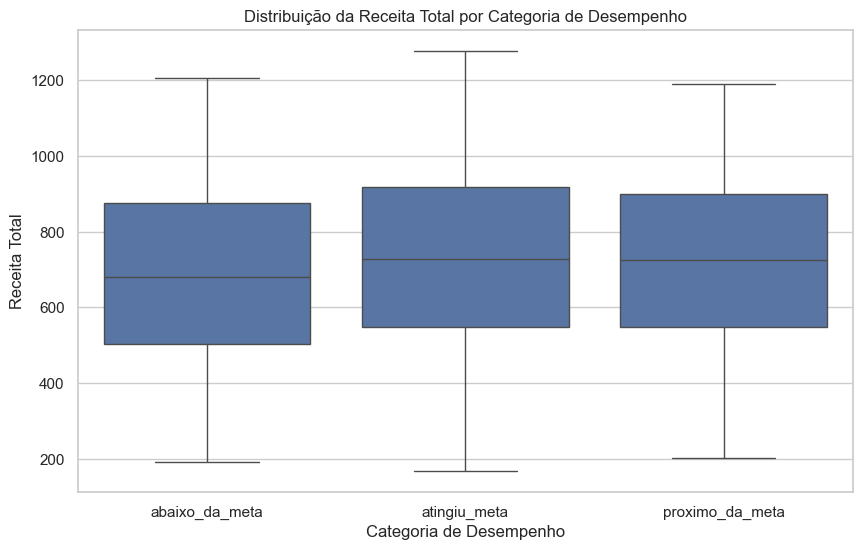

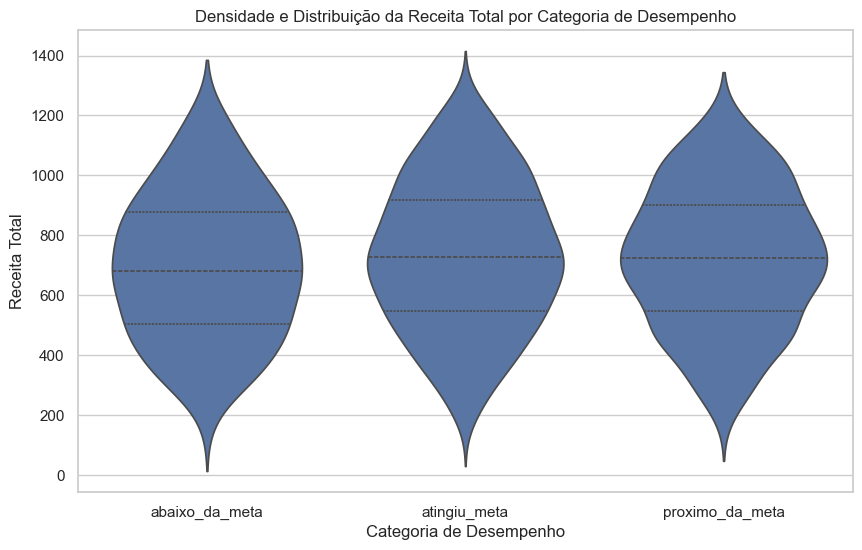

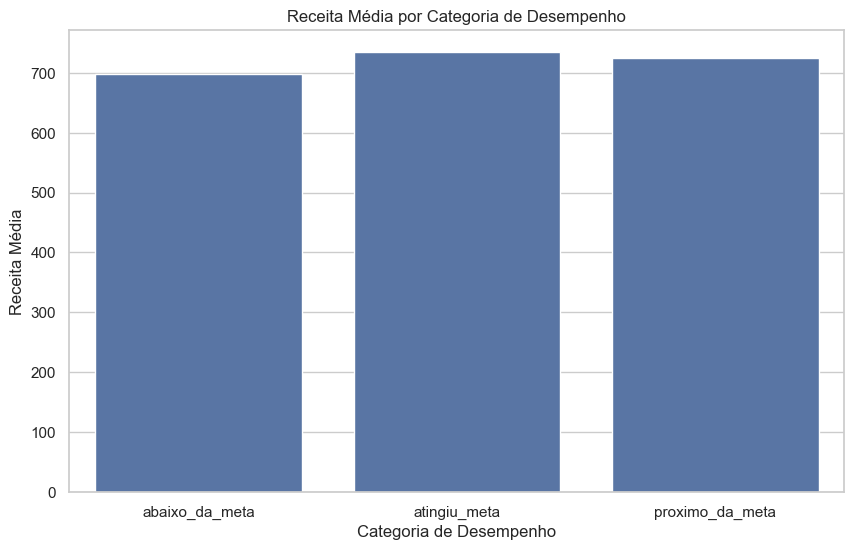

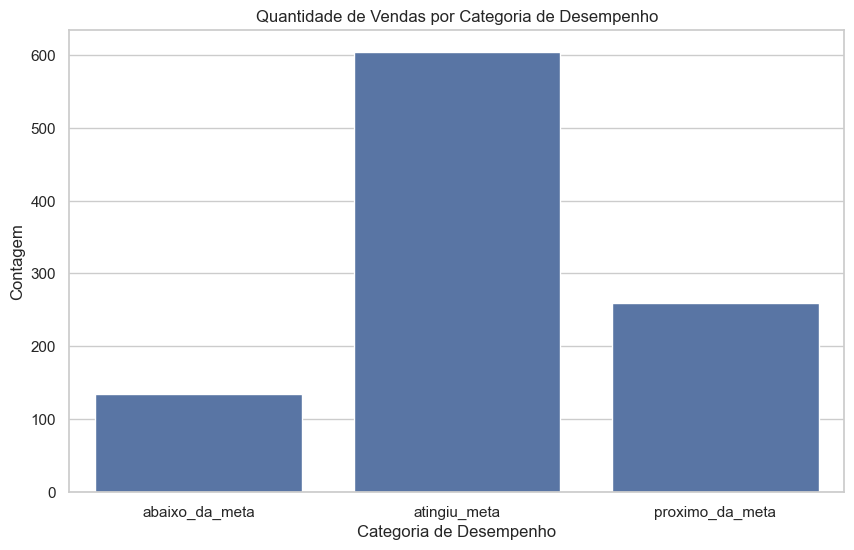

In [19]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='categoria_desempenho', y='receita_total', data=df1)
plt.title('Distribuição da Receita Total por Categoria de Desempenho')
plt.xlabel('Categoria de Desempenho')
plt.ylabel('Receita Total')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='categoria_desempenho', y='receita_total', data=df1, inner="quartile")
plt.title('Densidade e Distribuição da Receita Total por Categoria de Desempenho')
plt.xlabel('Categoria de Desempenho')
plt.ylabel('Receita Total')
plt.show()

plt.figure(figsize=(10, 6))
mean_data = df1.groupby('categoria_desempenho')['receita_total'].mean().reset_index()
sns.barplot(x='categoria_desempenho', y='receita_total', data=mean_data)
plt.title('Receita Média por Categoria de Desempenho')
plt.xlabel('Categoria de Desempenho')
plt.ylabel('Receita Média')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='categoria_desempenho', data=df1)
plt.title('Quantidade de Vendas por Categoria de Desempenho')
plt.xlabel('Categoria de Desempenho')
plt.ylabel('Contagem')
plt.show()

## Hipotese 2

### Planos com periodicidade anual têm menor churn_rate?**

---

#### **Análise dos Dados**

1. **Churn Rate Médio por Periodicidade**  
   - **Anual**: **0,08** (8%).  
   - **Semestral**: **0,10** (10%).  
   - **Mensal**: **0,15** (15%).

2. **Distribuição do Churn Rate**  
   - **Planos Anuais**: Concentração abaixo de **0,10**, com menor dispersão.  
   - **Planos Mensais**: Valores variando entre **0,10–0,25**, com maior frequência em taxas mais altas.  
   - **Planos Semestrais**: Intermediários, com churn rate entre **0,10–0,15**.

3. **Quantidade de Vendas por Periodicidade**  
   - **Mensal**: 845 vendas (84,5% do total).  
   - **Anual**: 144 vendas (14,4%).  
   - **Semestral**: 10 vendas (1%).

---

#### **Principais Conclusões**

1. **Churn Rate Mais Baixo em Planos Anuais**  
   - Planos anuais apresentam o **menor churn rate (8%)**, seguidos por semestrais (10%) e mensais (15%).  
   - Isso sugere que clientes com planos anuais têm **maior retenção**, possivelmente devido a compromissos de longo prazo, descontos ou benefícios exclusivos.

2. **Relação entre Periodicidade e Retenção**  
   - Planos de curto prazo (mensais) têm **maior rotatividade**, enquanto planos de longo prazo (anuais) promovem estabilidade.  
   - A baixa adesão a planos semestrais (1% das vendas) pode indicar falta de atratividade ou desconhecimento por parte dos clientes.

3. **Possíveis Vieses**  
   - A amostra pequena de planos semestrais (10 vendas) pode distorcer a análise, tornando os dados menos representativos.

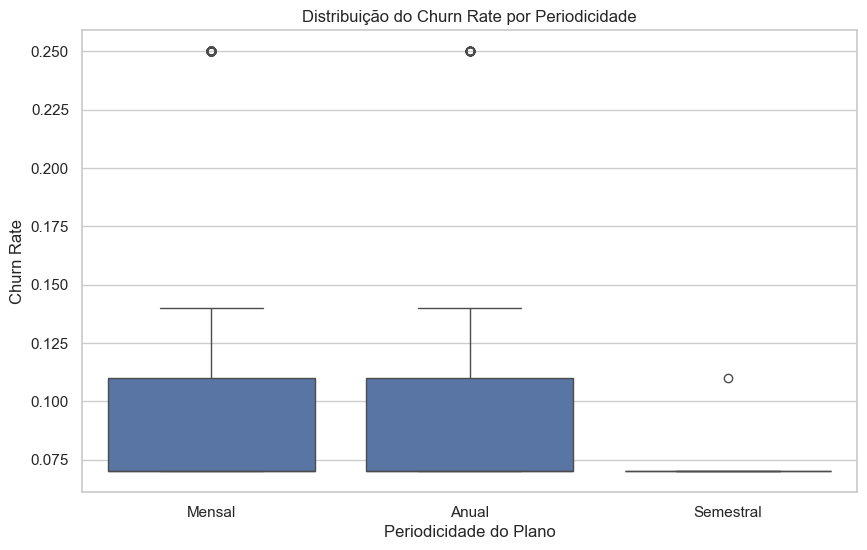

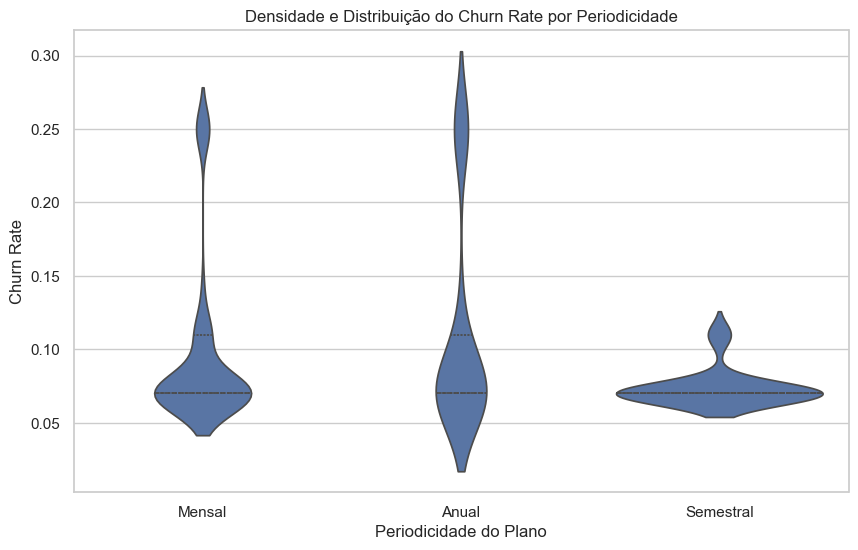

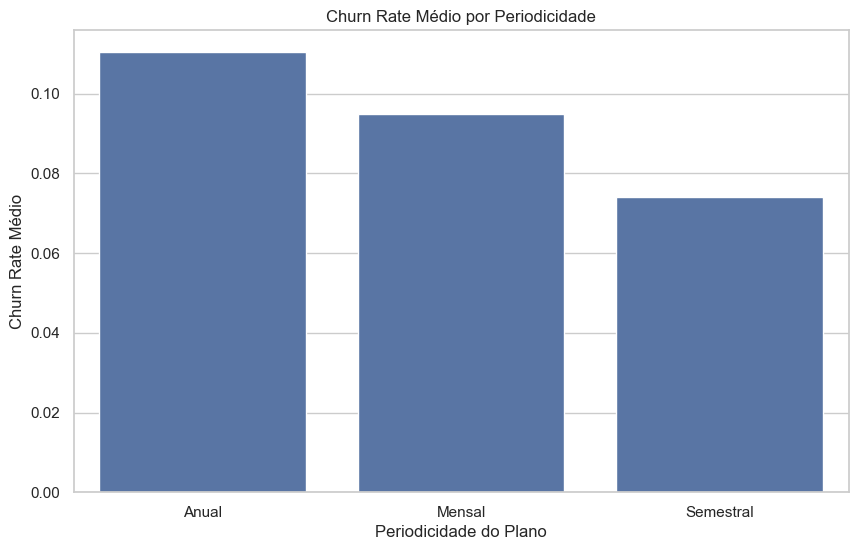

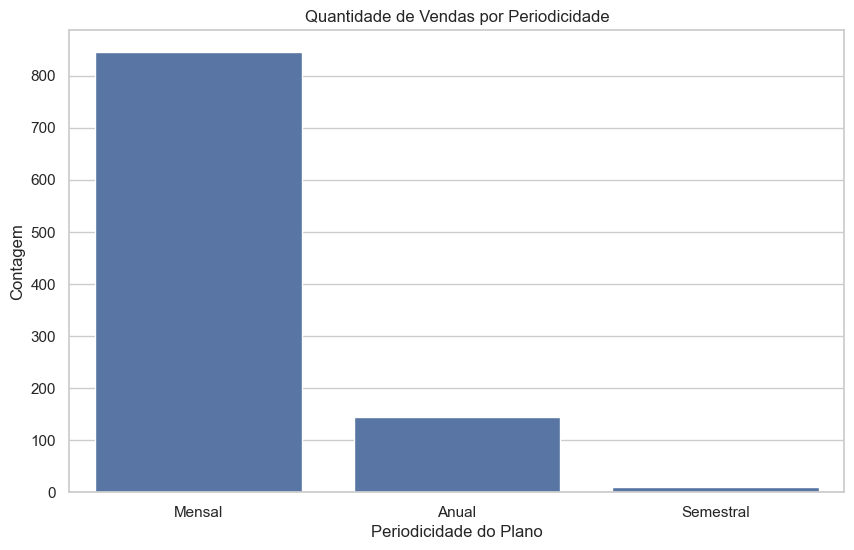

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='periodicidade', y='churn_rate', data=df1)
plt.title('Distribuição do Churn Rate por Periodicidade')
plt.xlabel('Periodicidade do Plano')
plt.ylabel('Churn Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='periodicidade', y='churn_rate', data=df1, inner="quartile")
plt.title('Densidade e Distribuição do Churn Rate por Periodicidade')
plt.xlabel('Periodicidade do Plano')
plt.ylabel('Churn Rate')
plt.show()

plt.figure(figsize=(10, 6))
mean_churn = df1.groupby('periodicidade')['churn_rate'].mean().reset_index()
sns.barplot(x='periodicidade', y='churn_rate', data=mean_churn)
plt.title('Churn Rate Médio por Periodicidade')
plt.xlabel('Periodicidade do Plano')
plt.ylabel('Churn Rate Médio')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='periodicidade', data=df1)
plt.title('Quantidade de Vendas por Periodicidade')
plt.xlabel('Periodicidade do Plano')
plt.ylabel('Contagem')
plt.show()


## Hipotese 3

###  Vendedores com maior diversificação de planos vendidos (`categoria_diversificacao`) têm maior receita total e menor churn_rate?

---

#### **Análise dos Gráficos**

**Distribuição de `qtd_tipos_planos_vendidos`**  
- A maioria absoluta dos vendedores atua com **6 tipos de planos vendidos**, enquanto poucos têm apenas 4.  
- Isso indica que a alta diversificação de portfólio não é rara, mas sim dominante.

---

**Receita Total por Diversificação de Planos (Boxplot)**  
- **Alta Diversificação** mostra uma mediana ligeiramente superior em receita total em comparação com **Baixa Diversificação**.  
- No entanto, a sobreposição das distribuições (amplitude interquartil e outliers) indica que nem sempre alta diversificação garante receita excepcional.  
- A variabilidade dentro de cada grupo é grande, sugerindo que outros fatores também influenciam a receita.

---

**Churn Rate Médio por Diversificação de Planos**  
- Curiosamente, vendedores com **Alta Diversificação** apresentam churn_rate médio **mais alto (~10%)** do que aqueles com **Baixa Diversificação (~8%)**.  
- Isso contraria a expectativa inicial de que maior diversificação geraria retenção mais forte.  
- Pode indicar que oferecer muitos tipos de planos não necessariamente fideliza clientes — ou até cria complexidade que eleva o churn.

---

**Matriz de Correlação**  
- A correlação entre:
  - `nivel_diversificacao` e `receita_total` → **0.0041** (praticamente nula).  
  - `nivel_diversificacao` e `churn_rate` → **0.11** (fraca, mas positiva).  
- Esses resultados quantitativos reforçam que **diversificação de portfólio não tem relação estatística relevante nem com receita nem com churn** no conjunto analisado.

---

#### **Conclusões**

**Hipótese Rejeitada**  
Não há evidências claras de que vendedores com maior diversificação de planos vendidos tenham maior receita total nem menor churn_rate.

**Insights Importantes**  
- A diversificação, por si só, não garante melhores resultados.  
- Estratégias comerciais precisam ser mais focadas em **qualidade das vendas**, **adequação de planos ao perfil do cliente** e **gestão ativa de churn**.

In [21]:
valores_unicos = sorted(df1['qtd_tipos_planos_vendidos'].unique())
print("Valores únicos em 'qtd_tipos_planos_vendidos':", valores_unicos)

bins = [3.9, 5.9, 6.9] 
labels = ['Baixa Diversificação', 'Alta Diversificação']

df1['categoria_diversificacao'] = pd.cut(
    df1['qtd_tipos_planos_vendidos'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

Valores únicos em 'qtd_tipos_planos_vendidos': [4, 6]


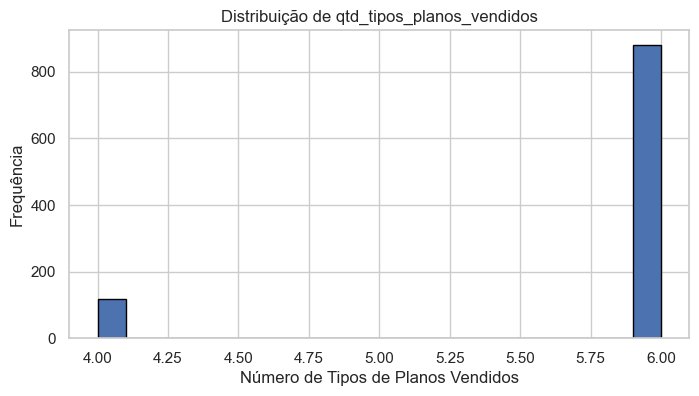

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(df1['qtd_tipos_planos_vendidos'], bins=20, edgecolor='black')
plt.title('Distribuição de qtd_tipos_planos_vendidos')
plt.xlabel('Número de Tipos de Planos Vendidos')
plt.ylabel('Frequência')
plt.show()

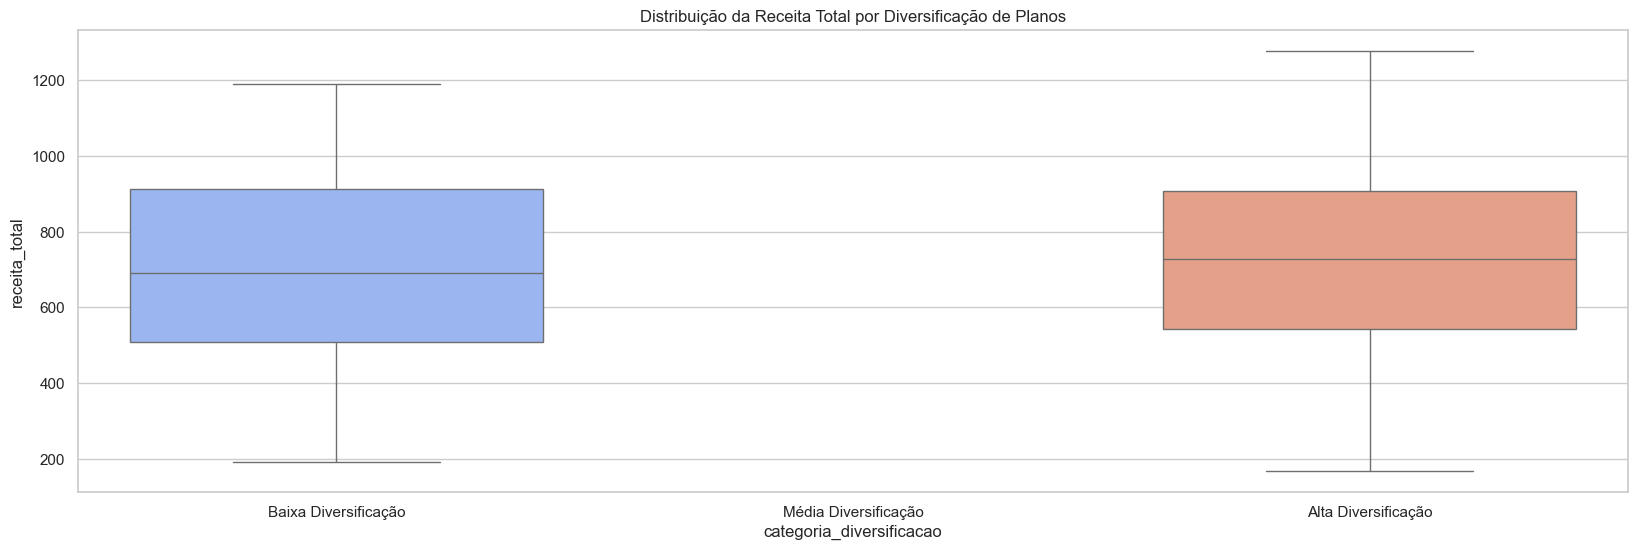

In [23]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df1, x='categoria_diversificacao', y='receita_total', order=['Baixa Diversificação', 'Média Diversificação', 'Alta Diversificação'], palette='coolwarm')
plt.title('Distribuição da Receita Total por Diversificação de Planos')
plt.show()

In [24]:
churn_por_diversificacao = df1.groupby('categoria_diversificacao')['churn_rate'].mean().reset_index()
print("\nChurn Rate Médio por Categoria de Diversificação:")
churn_por_diversificacao



Churn Rate Médio por Categoria de Diversificação:


,categoria_diversificacao,churn_rate
0,Baixa Diversificação,0.079
1,Alta Diversificação,0.099


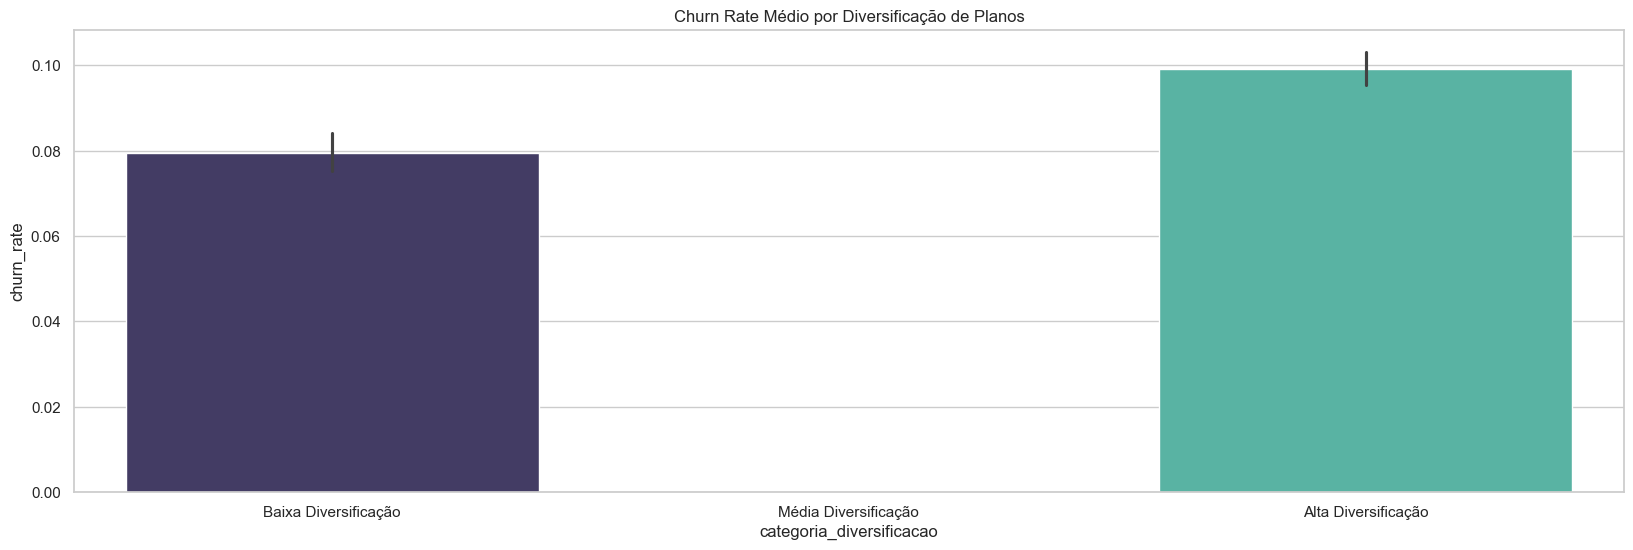

In [25]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df1, x='categoria_diversificacao', y='churn_rate', order=['Baixa Diversificação', 'Média Diversificação', 'Alta Diversificação'], ci=95, palette='mako')
plt.title('Churn Rate Médio por Diversificação de Planos')
plt.show()

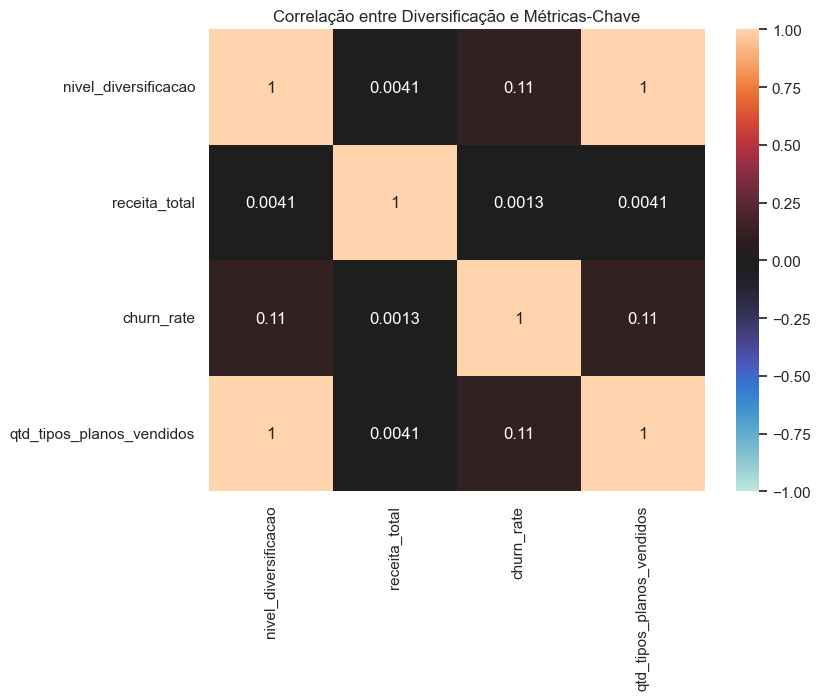

In [26]:
df1['nivel_diversificacao'] = df1['categoria_diversificacao'].map({
    'Baixa Diversificação': 1,
    'Média Diversificação': 2,
    'Alta Diversificação': 3
})

correlacao = df1[['nivel_diversificacao', 'receita_total', 'churn_rate', 'qtd_tipos_planos_vendidos']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='icefire', vmin=-1, vmax=1)
plt.title('Correlação entre Diversificação e Métricas-Chave')
plt.show()